Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `LAB_SECTION` below:

In [1]:
NAME = "Syed Zuhair Hossain"
ID = "19101573"
LAB_SECTION = "02"

---

Polynomial Root Finding Using Bisection Method
---

### `pandas` Dataframe:
Before we start we will know a little about `pandas` dataframe. `pandas` is a python library. Dataframes are classes that are used to store complex data. You can initialize one as a python dictionary. Let's take a look. 

In [2]:
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [1.0, 5.2, 3.9, 8.4, 14.6, 12.3, 8.9, 10.2]

dictionary = {
    "x": x,
    "y": y,
}
df = pd.DataFrame(dictionary)
df.head(8)

,x,y
0,0,1.0
1,1,5.2
2,2,3.9
3,3,8.4
4,4,14.6
5,5,12.3
6,6,8.9
7,7,10.2


We can use it to print data in a tabular format. We can even use more numpy arrays with it.

In [3]:
import numpy as np

x = np.linspace(0, np.pi/2, 15)
y = np.sin(x)

dictionary = {
    "x": x,
    "sin(x)": y,
}
df = pd.DataFrame(dictionary)
df.head(15)

,x,sin(x)
0,0.000000,0.000000
1,0.112200,0.111964
2,0.224399,0.222521
3,0.336599,0.330279
4,0.448799,0.433884
5,0.560999,0.532032
6,0.673198,0.623490
7,0.785398,0.707107
8,0.897598,0.781831
9,1.009798,0.846724


### Root Finding:
Let $f(x)$ be a function of $x$. if for some $x=\alpha, f(x) = f(\alpha) = 0$, we say $\alpha$ is a root of function $x$.

Let, 
$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{6.1}$$

The graph of $f(x)$ looks like this.

[-2.         -1.92076271 -0.5819979   0.67242436  1.33033625]


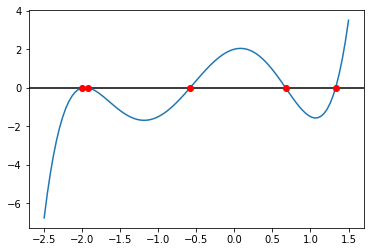

In [4]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
x = np.linspace(-2.5, 1.5, 100)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0, color='k')
plt.plot(x, y)
plt.plot(f.roots(), [0.0]*5, 'ro')
print(f.roots())

Roots are the points where the graph intersects with the $X$-axis.

### Bisection

One way to find out root's are to use bisection method. Here is the strategy, if $\alpha$ is a root between and interval $[a, b]$ then graph will cross the $X$-axis at $\alpha$. So, $sign( f(\alpha-h) ) = - sign( f(\alpha+h) )$, for small value of $h$. 

So, we can work our way up towards the root by taking average of $a$ and $b$, as long as the signs are different.

we will start with $a_0$ and $b_0$, such that, $f(a_0) f(b_0) < 0$.
Then we iterate as this,
\begin{align}
m_k &= \frac{a_k + b_k}{2} \\
\text{if, } f(a_k) f(m_k) < 0, \text{ then, } a_{k+1} &= a_k \text{ and } b_{k+1} = m_k\\
\text{else, } a_{k+1} &= m_k \text{ and, } b_{k+1} = b_k
\end{align}

We keep iterating until we find the root with sufficient precision. We usually use a formula like this,
$$
\frac{|m_{k+1} - m_k|}{|m_{k+1}|} \leq \epsilon \\  
$$
Where, $\epsilon$ is a very small value, like $\epsilon < 10^{-6}$

### Complete the code below
Complete the code below to iterate and solve for a root of the following equation, between the interval, $[-0.5, 1.3]$:
\begin{aligned}
    f(x) = 2 + x - 6x^2 - 2x^3 + 2.5x^4 + x^5.
\end{aligned}

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# The polynomial and the range is defined for you
f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
a = -0.5
b = 1.3
m = (a + b) / 2
e = 1e-6

root = m    # You need to update this value

# Populate the following lists in each iteration
list_a = [-0.5]
list_b = [1.3]
list_m = [m]
list_f = [f(m)]

# YOUR CODE HERE
# raise NotImplementedError()

x = 0
y = 0
val = 2e1
while(val >= e):
    if(f(list_a[x]) * f(list_m[x]) < 0):
        list_a.append(list_a[x])
        list_b.append(list_m[x])
    elif(f(list_b[x]) * f(list_m[x]) < 0):
        list_a.append(list_m[x])
        list_b.append(list_b[x])
    m = (list_a[x + 1] + list_b[x + 1]) / 2
    root = m
    list_f.append(f(m))
    list_m.append(m)
        
    if x > 1:
        val = (abs(list_m[y + 1] - list_m[y]) / abs(list_m[y]))
    print(val)
    x = x + 1
    y = y + 1

20.0
20.0
0.18000000000000008
0.07627118644067798
0.04128440366972487
0.021531100478469036
0.010538641686182735
0.00521436848203943
0.002620850320326249
0.001306999709555752
0.0006543550966992081
0.0003269635980527831
0.00016342836390058934
8.170082971728208e-05
4.0847077618425525e-05
2.0422704601330178e-05
1.0211560848355814e-05
5.105728286722832e-06
2.5528771775760805e-06
1.2764353301228634e-06
6.382184797060476e-07


           a         b         m          f(m)
0  -0.500000  1.300000  0.400000  1.386240e+00
1   0.400000  1.300000  0.850000 -9.645291e-01
2   0.400000  0.850000  0.625000  2.698059e-01
3   0.625000  0.850000  0.737500 -3.704366e-01
4   0.625000  0.737500  0.681250 -5.048749e-02
5   0.625000  0.681250  0.653125  1.102363e-01
6   0.653125  0.681250  0.667188  2.994460e-02
7   0.667188  0.681250  0.674219 -1.026345e-02
8   0.667188  0.674219  0.670703  9.843782e-03
9   0.670703  0.674219  0.672461 -2.091832e-04
10  0.670703  0.672461  0.671582  4.817481e-03
11  0.671582  0.672461  0.672021  2.304192e-03
12  0.672021  0.672461  0.672241  1.047515e-03
13  0.672241  0.672461  0.672351  4.191684e-04
14  0.672351  0.672461  0.672406  1.049933e-04
15  0.672406  0.672461  0.672433 -5.209479e-05
16  0.672406  0.672433  0.672420  2.644928e-05
17  0.672420  0.672433  0.672427 -1.282275e-05
18  0.672420  0.672427  0.672423  6.813270e-06
19  0.672423  0.672427  0.672425 -3.004737e-06
20  0.672423 

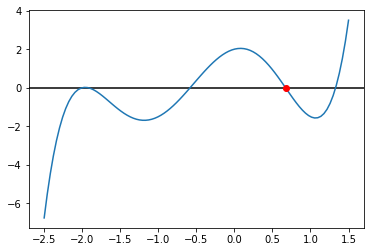

In [6]:
xs = np.linspace(-2.5, 1.5, 100)
ys = f(xs)

plt.axhline(y=0, color='k')
plt.plot(xs, ys)
plt.plot(root, f(root), 'ro')

print(pd.DataFrame({'a':list_a, 'b':list_b, 'm':list_m, 'f(m)':list_f}))

assert "{:.3f}".format(root) == "0.672"